#  Project on the 120 Years of the Olympic Games dataset
---

### Question - What is the probability of someone winning a medal in an individual race based on their age, height, gender, weight?

---

GROUP 3  
*NTU Summer 2019 - CZ1016*  
*25.07.2019*

![Olympic rings](images/olympic2.jpg)

---

#### Importing the Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

#### Importing the Olympic Games dataset

In [2]:
athleteData = pd.read_csv('120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

print("Data type : ", type(athleteData))
print("Data dims : ", athleteData.shape)

athleteData.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


---

Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:  

---

>  **ID** - Unique number for each athlete  
>  **Name** - Athlete's name  
>  **Sex** - M or F  
>  **Age** - Integer  
>  **Height** - In centimeters  
>  **Weight** - In kilograms  
>  **Team** - Team name  
> **NOC** - National Olympic Committee 3-letter code  
> **Games** - Year and season  
> **Year** - Integer  
> **Season** - Summer or Winter  
> **City** - Host city  
> **Sport** - Sport  
> **Event** - Event  
> **Medal** - Gold, Silver, Bronze, or NA  
---

Learn more : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


#### Checking the variables - their types and number of entries - in the dataset

In [3]:
print(athleteData.dtypes)

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


In [4]:
athleteData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Exploratory data analysis visualization I

#### Combining the numerical variables in one dataframe

In [5]:
numDF = pd.DataFrame(athleteData[["Age", "Height", "Weight"]])
numDF.describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


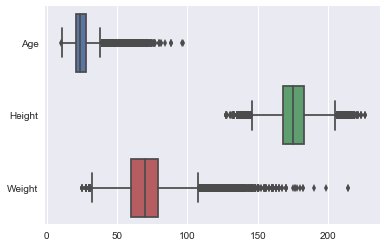

In [8]:
sb.boxplot(data = numDF, orient = "h")

#### Printing the number of NaNs

In [9]:
print(athleteData.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [10]:
# Number of Teams
print("Number of Teams :", len(athleteData["NOC"].unique()))

Number of Teams : 230


In [11]:
# All Sports
print("Number of Sports :", len(athleteData["Sport"].unique()))
print(athleteData["Sport"].value_counts())
sb.catplot(y = "Sport", data = athleteData, kind = "count", height=20)

Number of Sports : 66
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton        

AttributeError: module 'seaborn' has no attribute 'catplot'

---
### Preparing the dataset 

In [12]:
#Cleaning the dataset by removing all team Events as well as all team sports 

In [13]:
to_drop = ['Relay', 'Pair', 'Four', 'Double', 'Two', 'Three', 'Team', 'Eight']
atClean = athleteData[~athleteData['Event'].str.contains('|'.join(to_drop))]

In [14]:
teamsports = ['Ice Hockey','Water Polo', 'Basketball', 'Hockey', 'Handball', 'Art Competitions', 'Volleyball', 'Beach Volleyball', 'Football', 'Tug-Of-War','Golf','Softball','Baseball','Rugby Sevens','Trampolining','Curling','Rugby','Skeleton','Lacrosse','Polo','Cricket', 'Racquets','Motorboating','Military Ski Patrol','Croquet','Jeu De Paume','Roque','Basque Pelota','Aeronautics', 'Alpinism']
for var in teamsports :
    removing = atClean[atClean['Sport']==var].index
    atClean.drop(removing, inplace=True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
atClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167216 entries, 1 to 271112
Data columns (total 15 columns):
ID        167216 non-null int64
Name      167216 non-null object
Sex       167216 non-null object
Age       161487 non-null float64
Height    132494 non-null float64
Weight    131194 non-null float64
Team      167216 non-null object
NOC       167216 non-null object
Games     167216 non-null object
Year      167216 non-null int64
Season    167216 non-null object
City      167216 non-null object
Sport     167216 non-null object
Event     167216 non-null object
Medal     15112 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.4+ MB


#### Checking the clean data - variable Sports

In [17]:
print("Number of Sports :", len(atClean["Sport"].unique()))
print(atClean["Sport"].value_counts())
sb.catplot(y = "Sport", data = atClean, kind = "count", height=20)

Number of Sports : 35
Athletics                    32750
Gymnastics                   22315
Swimming                     16668
Alpine Skiing                 8829
Shooting                      8109
Cycling                       7450
Wrestling                     7154
Cross Country Skiing          7081
Boxing                        6047
Fencing                       5547
Speed Skating                 5428
Weightlifting                 3917
Judo                          3801
Biathlon                      3485
Sailing                       3398
Diving                        2842
Equestrianism                 2173
Canoeing                      2144
Ski Jumping                   1991
Rowing                        1733
Figure Skating                1520
Archery                       1460
Tennis                        1400
Modern Pentathlon             1170
Table Tennis                  1054
Short Track Speed Skating     1048
Nordic Combined               1043
Freestyle Skiing               93

AttributeError: module 'seaborn' has no attribute 'catplot'

#### Printing the number of NaNs (in each variable) in the clean data

In [18]:
print(atClean.isnull().sum())

ID             0
Name           0
Sex            0
Age         5729
Height     34722
Weight     36022
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     152104
dtype: int64


#### Changing NaNs to No as NaNs stands for No medal won

In [19]:
atClean['Medal'].fillna('No', inplace = True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Combining Gold, Silver and Bronze Medals in one category - Yes - respresenting that a Medal was won 

In [20]:
a = atClean['Medal']
b = {'Gold': 'Yes', 'Silver': 'Yes', 'Bronze': 'Yes'}
for x,y in b.items():
    a = a.replace(x, y)

In [21]:
print(atClean["Medal"].value_counts())

No        152104
Bronze      5256
Gold        4952
Silver      4904
Name: Medal, dtype: int64


In [22]:
atClean.drop(['Medal'], axis=1, inplace=True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
atClean.insert(2, "Medal", a)

In [24]:
print(atClean["Medal"].value_counts())

No     152104
Yes     15112
Name: Medal, dtype: int64


### Adding a new column Gender which is turning M/F to 1/0 - categorial to numerical variable - with values 0 for Women and 1 for Men 

In [25]:
atClean['Gender']=np.where(atClean['Sex'].str.contains('M'), 1, 0)
atClean.head()

/Users/Caio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ID,Name,Medal,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Gender
1,2,A Lamusi,No,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,1
4,5,Christine Jacoba Aaftink,No,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,No,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,No,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,No,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0


---

## The sports we are focusing on are Swimming, Gymnastics, Athletics  

---

#### Creating dataframes for each sport we are exploring

In [26]:
GymnasticsData = atClean[(atClean['Sport'] == "Gymnastics")]
SwimmingData = atClean[(atClean['Sport'] == "Swimming")]
AthleticsData = atClean[(atClean['Sport'] == "Athletics")]

#### Separating the sports data in 2 - MY (Medal Yes) and MN (Medal No)

In [27]:
SwimmingMY = atClean[(atClean['Sport'] == "Swimming") & (atClean['Medal'] == "Yes")]
SwimmingMN = atClean[(atClean['Sport'] == "Swimming") & (atClean['Medal'] == "No")]

In [28]:
SwimmingMY.mean()

ID        69341.822767
Age          20.759797
Height      180.054451
Weight       72.376344
Year       1976.416427
Gender        0.547550
dtype: float64

In [29]:
SwimmingMN.mean()

ID        67804.501636
Age          20.430511
Height      177.700634
Weight       69.719113
Year       1984.397251
Gender        0.576243
dtype: float64

In [30]:
GymnasticsMY = atClean[(atClean['Sport'] == "Gymnastics") & (atClean['Medal'] == "Yes")]
GymnasticsMN = atClean[(atClean['Sport'] == "Gymnastics") & (atClean['Medal'] == "No")]

In [31]:
AthleticsMY = atClean[(atClean['Sport'] == "Athletics") & (atClean['Medal'] == "Yes")]
AthleticsMN = atClean[(atClean['Sport'] == "Athletics") & (atClean['Medal'] == "No")]

#### Filling all the missing values with the mean of the variable in each of the cases - Medal Yes and Medal No 
Variables - Age, Height, Weight  
Sports - Swimming,Gymnastics, Athletics  

In [32]:
if  [SwimmingData['Medal'] == "Yes"]:
    SwimmingData['Age'].fillna((SwimmingMY['Age'].mean()), inplace=True)
    SwimmingData['Height'].fillna((SwimmingMY['Height'].mean()), inplace=True)
    SwimmingData['Weight'].fillna((SwimmingMY['Weight'].mean()), inplace=True)
else:
    SwimmingData['Age'].fillna((SwimmingMN['Age'].mean()), inplace=True)
    SwimmingData['Height'].fillna((SwimmingMN['Height'].mean()), inplace=True)
    SwimmingData['Weight'].fillna((SwimmingMN['Weight'].mean()), inplace=True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
if  [GymnasticsData['Medal'] == "Yes"]:
    GymnasticsData['Age'].fillna((GymnasticsMY['Age'].mean()), inplace=True)
    GymnasticsData['Height'].fillna((GymnasticsMY['Height'].mean()), inplace=True)
    GymnasticsData['Weight'].fillna((GymnasticsMY['Weight'].mean()), inplace=True)
else:
    GymnasticsData['Age'].fillna((GymnasticsMN['Age'].mean()), inplace=True)
    GymnasticsData['Height'].fillna((GymnasticsMN['Height'].mean()), inplace=True)
    GymnasticsData['Weight'].fillna((GymnasticsMN['Weight'].mean()), inplace=True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
if  [AthleticsData['Medal'] == "Yes"]:
    AthleticsData['Age'].fillna((AthleticsMY['Age'].mean()), inplace=True)
    AthleticsData['Height'].fillna((AthleticsMY['Height'].mean()), inplace=True)
    AthleticsData['Weight'].fillna((AthleticsMY['Weight'].mean()), inplace=True)
else:
    AthleticsData['Age'].fillna((AthleticsMN['Age'].mean()), inplace=True)
    AthleticsData['Height'].fillna((AthleticsMN['Height'].mean()), inplace=True)
    AthleticsData['Weight'].fillna((AthleticsMN['Weight'].mean()), inplace=True)

/Users/Caio/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Exploratory data analysis and visualization II

#### Printing out the 5 best Athletes in the three sports  
S - Swimming, G - Gymnastics, A - Athletics


In [35]:
best_S = SwimmingMY.groupby(['Name'])['Medal'].value_counts().sort_values(ascending=False)
best_S.head(n=5)

Name                             Medal
Michael Fred Phelps, II          Yes      16
Kirsty Leigh Coventry (-Seward)  Yes       7
Ryan Steven Lochte               Yes       7
Zoltn Imre dn von Halmay         Yes       7
Krisztina Egerszegi              Yes       7
Name: Medal, dtype: int64

In [34]:
best_G = GymnasticsMY.groupby(['Name'])['Medal'].value_counts().sort_values(ascending=False)
best_G.head(n=5)

Name                                Medal
Larysa Semenivna Latynina (Diriy-)  Yes      14
Nikolay Yefimovich Andrianov        Yes      12
Borys Anfiyanovych Shakhlin         Yes      10
Aleksey Yuryevich Nemov             Yes      10
Takashi Ono                         Yes      10
Name: Medal, dtype: int64

In [35]:
best_A = AthleticsMY.groupby(['Name'])['Medal'].value_counts().sort_values(ascending=False)
best_A.head(n=5)

Name                            Medal
Raymond Clarence "Ray" Ewry     Yes      10
Martin Joseph Sheridan          Yes       9
Paavo Johannes Nurmi            Yes       9
Frederick Carlton "Carl" Lewis  Yes       8
Merlene Joyce Ottey-Page        Yes       7
Name: Medal, dtype: int64

### Countplots for the number of individual medals athletes in the three sports got 

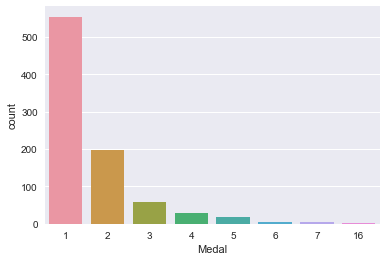

In [36]:
sb.countplot(best_S)

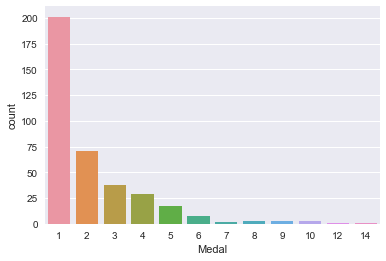

In [37]:
sb.countplot(best_G)

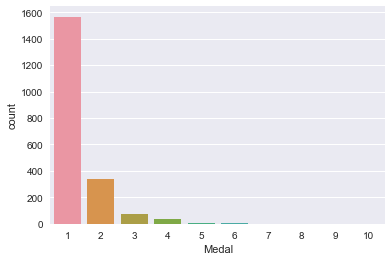

In [38]:
sb.countplot(best_A)

### Violinplots for the Swimming Data (Medal No and Medal Yes)

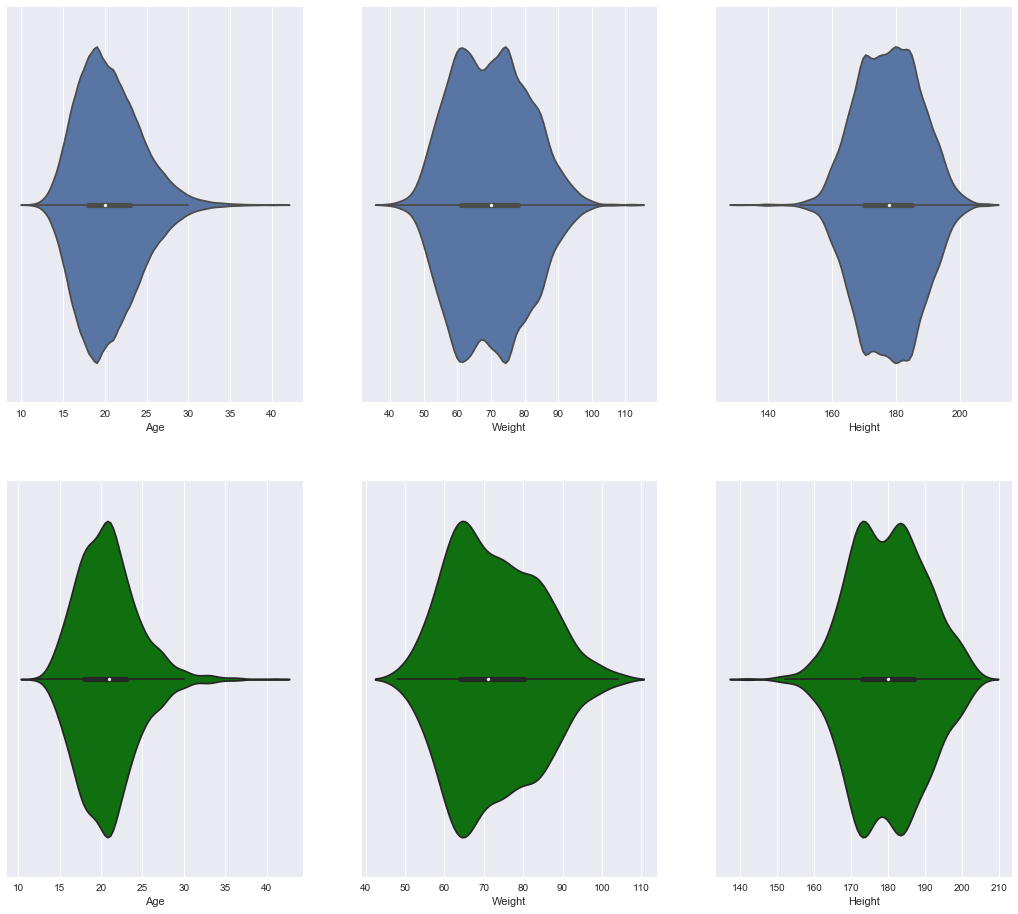

In [39]:
f, axes = plt.subplots(2, 3, figsize=(18, 16))

sb.violinplot(SwimmingMN["Age"], ax = axes[0,0])
sb.violinplot(SwimmingMN["Weight"], ax = axes[0,1])
sb.violinplot(SwimmingMN["Height"], ax = axes[0,2])
sb.violinplot(SwimmingMY["Age"], ax = axes[1,0], color = "green")
sb.violinplot(SwimmingMY["Weight"], ax = axes[1,1], color = "green")
sb.violinplot(SwimmingMY["Height"], ax = axes[1,2], color = "green")

### Violinplots for the Gymnastics Data (Medal No and Medal Yes)

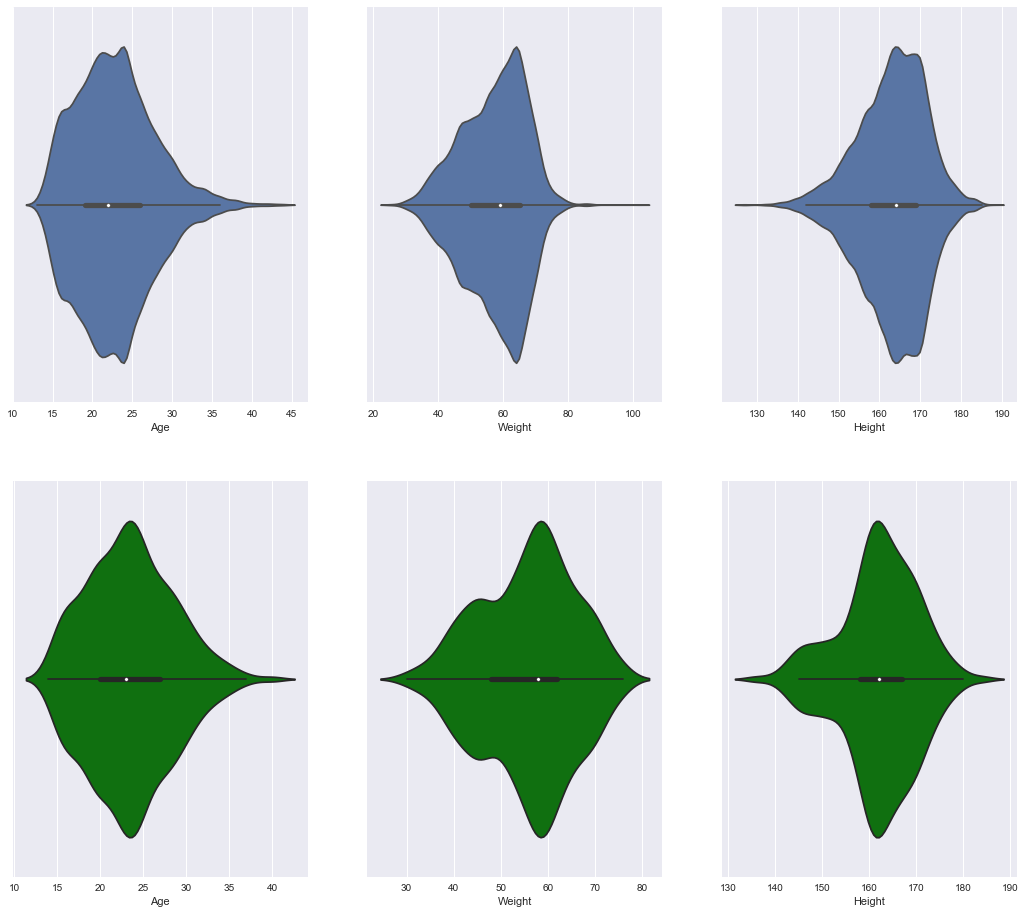

In [40]:
f, axes = plt.subplots(2, 3, figsize=(18, 16))

sb.violinplot(GymnasticsMN["Age"], ax = axes[0,0])
sb.violinplot(GymnasticsMN["Weight"], ax = axes[0,1])
sb.violinplot(GymnasticsMN["Height"], ax = axes[0,2])
sb.violinplot(GymnasticsMY["Age"], ax = axes[1,0], color = "green")
sb.violinplot(GymnasticsMY["Weight"], ax = axes[1,1], color = "green")
sb.violinplot(GymnasticsMY["Height"], ax = axes[1,2], color = "green")

### Violinplots for the Athletics Data (Medal No and Medal Yes)

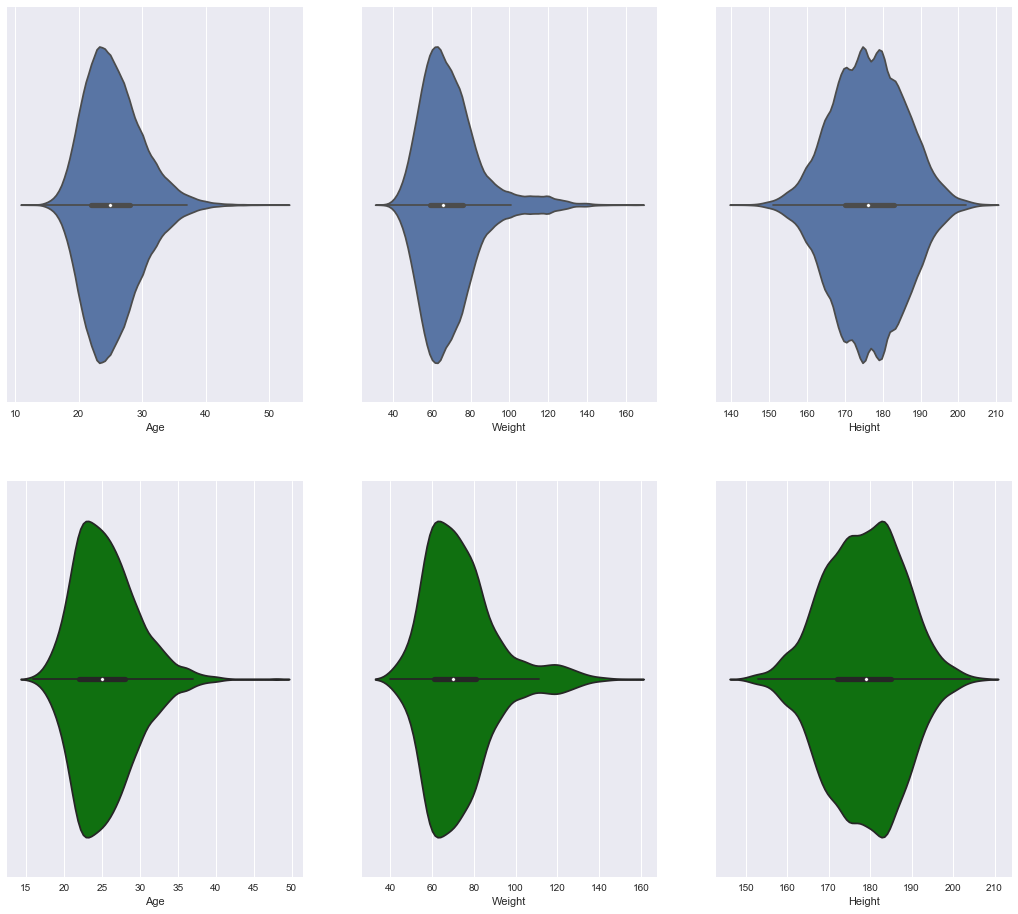

In [41]:
f, axes = plt.subplots(2, 3, figsize=(18, 16))

sb.violinplot(AthleticsMN["Age"], ax = axes[0,0])
sb.violinplot(AthleticsMN["Weight"], ax = axes[0,1])
sb.violinplot(AthleticsMN["Height"], ax = axes[0,2])
sb.violinplot(AthleticsMY["Age"], ax = axes[1,0], color = "green")
sb.violinplot(AthleticsMY["Weight"], ax = axes[1,1], color = "green")
sb.violinplot(AthleticsMY["Height"], ax = axes[1,2], color = "green")

# Swimming model


In [42]:
Smedal = pd.DataFrame(SwimmingData['Medal'])       
Sage = pd.DataFrame(SwimmingData['Age'])  
Sheight = pd.DataFrame(SwimmingData['Height'])

No     15280
Yes     1388
Name: Medal, dtype: int64


,ID,Age,Height,Weight,Year,Gender
count,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000,16668.000000
mean,67932.519498,20.465834,178.295867,70.425348,1983.732661,0.573854
std,39115.861988,3.713738,8.963078,10.092770,26.443155,0.494530
min,10.000000,11.000000,131.000000,39.000000,1896.000000,0.000000
25%,34259.500000,18.000000,172.000000,63.000000,1972.000000,0.000000
50%,68562.000000,20.000000,180.054451,72.376344,1988.000000,1.000000
75%,101309.000000,23.000000,183.000000,76.000000,2004.000000,1.000000
max,135556.000000,41.000000,209.000000,112.000000,2016.000000,1.000000


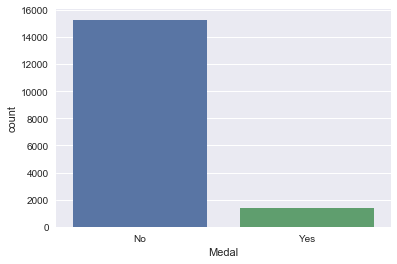

In [43]:
print(SwimmingData["Medal"].value_counts())
sb.countplot(SwimmingData['Medal'])
SwimmingData.describe()

## Balancing imbalanced classes by Up-sampling Minority Class  

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [44]:
from sklearn.utils import resample

In [45]:
# Separate majority and minority classes
s_df_majority = SwimmingData[SwimmingData.Medal=='No']
s_df_minority = SwimmingData[SwimmingData.Medal=='Yes']
 
# Upsample minority class
s_df_minority_upsampled = resample(s_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15280,    # to match majority class
                                 random_state=100) # reproducible results
 
# Combine majority class with upsampled minority class
s_df_upsampled = pd.concat([s_df_majority, s_df_minority_upsampled])
 
# Display new class counts
s_df_upsampled.Medal.value_counts()

No     15280
Yes    15280
Name: Medal, dtype: int64

---

## Use of data science / machine learning

### Prediction using a Random Forest

Multi-Variate Classification problem.   

Response Variable : **Medal**     
Predictors : **Age, Height, Weight, Gender**       

Train Set : (22920, 1) (22920, 4)
Test Set  : (7640, 1) (7640, 4)


/Users/Caio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6343804537521816

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6299738219895288



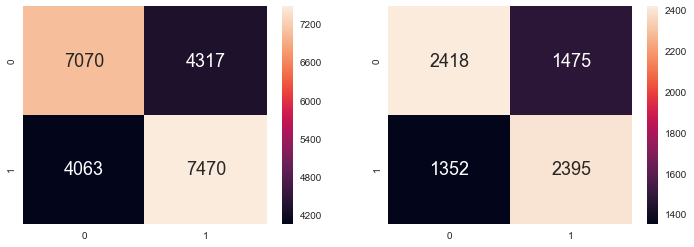

In [46]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Age", "Height", "Weight", "Gender"]

y = pd.DataFrame(s_df_upsampled['Medal'])
X = pd.DataFrame(s_df_upsampled[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X_train, y_train)                                        # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

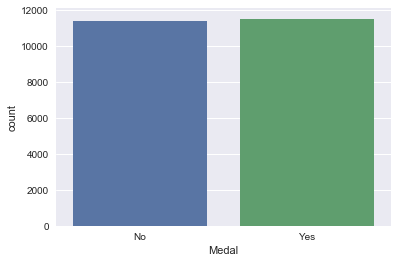

In [47]:
# Summary Statistics for Response
y_train["Medal"].value_counts()
sb.countplot(y_train["Medal"])

---

### Prediction of Class "Medal" Probabilities

In [48]:
# Extract Swimmers for Prediction
SwimmingData_pred = SwimmingData[SwimmingData["Name"].isin(["Michael Fred Phelps, II", "Rita Judit Kovcs", "Stefan Remco Aartsen"])]
SwimmingData_pred

,ID,Name,Medal,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Gender
100,36,Stefan Remco Aartsen,No,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,1
101,36,Stefan Remco Aartsen,No,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,1
103,36,Stefan Remco Aartsen,No,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 100 metres Butterfly,1
104,36,Stefan Remco Aartsen,No,M,25.0,194.0,78.0,Netherlands,NED,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,1
125691,63412,Rita Judit Kovcs,No,F,26.0,170.0,50.0,Hungary,HUN,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 800 metres Freestyle,0
187887,94406,"Michael Fred Phelps, II",No,M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,1
187888,94406,"Michael Fred Phelps, II",Yes,M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,1
187891,94406,"Michael Fred Phelps, II",Yes,M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,1
187892,94406,"Michael Fred Phelps, II",Yes,M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,1
187893,94406,"Michael Fred Phelps, II",Yes,M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,1


In [49]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(SwimmingData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)
y_pred

array(['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [50]:
y_pred = pd.DataFrame(y_pred, columns = ["PredMedal"], index = SwimmingData_pred.index)
Swimming_acc = pd.concat([SwimmingData_pred[["Name", "Medal"]], y_pred], axis = 1)

Swimming_acc

,Name,Medal,PredMedal
100,Stefan Remco Aartsen,No,Yes
101,Stefan Remco Aartsen,No,Yes
103,Stefan Remco Aartsen,No,No
104,Stefan Remco Aartsen,No,No
125691,Rita Judit Kovcs,No,No
187887,"Michael Fred Phelps, II",No,Yes
187888,"Michael Fred Phelps, II",Yes,Yes
187891,"Michael Fred Phelps, II",Yes,Yes
187892,"Michael Fred Phelps, II",Yes,Yes
187893,"Michael Fred Phelps, II",Yes,Yes


In [51]:
# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)
y_prob

array([[0.48485452, 0.51514548],
       [0.48485452, 0.51514548],
       [0.6199052 , 0.3800948 ],
       [0.6199052 , 0.3800948 ],
       [0.70347267, 0.29652733],
       [0.26264061, 0.73735939],
       [0.26885765, 0.73114235],
       [0.26885765, 0.73114235],
       [0.26885765, 0.73114235],
       [0.26885765, 0.73114235],
       [0.26885765, 0.73114235],
       [0.22503334, 0.77496666],
       [0.22503334, 0.77496666],
       [0.22503334, 0.77496666],
       [0.22503334, 0.77496666],
       [0.22503334, 0.77496666],
       [0.23414114, 0.76585886],
       [0.23414114, 0.76585886],
       [0.23414114, 0.76585886],
       [0.23414114, 0.76585886],
       [0.20969649, 0.79030351],
       [0.20969649, 0.79030351],
       [0.20969649, 0.79030351]])

In [52]:
# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProMedal"], index = SwimmingData_pred.index)
Swimming_conf = pd.concat([Swimming_acc, y_prob], axis = 1)

Swimming_conf

,Name,Medal,PredMedal,ProMedal
100,Stefan Remco Aartsen,No,Yes,0.515145
101,Stefan Remco Aartsen,No,Yes,0.515145
103,Stefan Remco Aartsen,No,No,0.380095
104,Stefan Remco Aartsen,No,No,0.380095
125691,Rita Judit Kovcs,No,No,0.296527
187887,"Michael Fred Phelps, II",No,Yes,0.737359
187888,"Michael Fred Phelps, II",Yes,Yes,0.731142
187891,"Michael Fred Phelps, II",Yes,Yes,0.731142
187892,"Michael Fred Phelps, II",Yes,Yes,0.731142
187893,"Michael Fred Phelps, II",Yes,Yes,0.731142


In [53]:
MP = SwimmingData[(SwimmingData["Name"] == "Michael Fred Phelps, II")]
RV = SwimmingData[(SwimmingData["Name"] == "Rita Judit Kovcs")]
SA = SwimmingData[(SwimmingData["Name"] == "Stefan Remco Aartsen")]

In [54]:
SA.describe()

,ID,Age,Height,Weight,Year,Gender
count,4.0,4.000000,4.0,4.0,4.000000,4.0
mean,36.0,23.000000,194.0,78.0,1998.000000,1.0
std,0.0,2.309401,0.0,0.0,2.309401,0.0
min,36.0,21.000000,194.0,78.0,1996.000000,1.0
25%,36.0,21.000000,194.0,78.0,1996.000000,1.0
50%,36.0,23.000000,194.0,78.0,1998.000000,1.0
75%,36.0,25.000000,194.0,78.0,2000.000000,1.0
max,36.0,25.000000,194.0,78.0,2000.000000,1.0


---

# Gymnastics 

---

In [55]:
Gmedal = pd.DataFrame(GymnasticsData['Medal'])       
Gage = pd.DataFrame(GymnasticsData['Age'])  
Gheight = pd.DataFrame(GymnasticsData['Height'])

No     21488
Yes      827
Name: Medal, dtype: int64


,ID,Age,Height,Weight,Year,Gender
count,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000,22315.000000
mean,70109.787184,22.757305,162.808871,56.732588,1971.845754,0.665561
std,38548.008741,4.796729,7.051283,8.297828,27.014230,0.471804
min,17.000000,13.000000,127.000000,25.000000,1896.000000,0.000000
25%,37876.000000,19.000000,160.000000,54.000000,1952.000000,0.000000
50%,69334.000000,23.000000,162.055105,55.758883,1972.000000,1.000000
75%,103839.000000,25.000000,167.000000,62.000000,1992.000000,1.000000
max,135481.000000,44.000000,188.000000,102.000000,2016.000000,1.000000


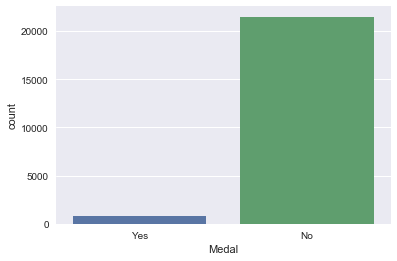

In [56]:
print(GymnasticsData["Medal"].value_counts())
sb.countplot(GymnasticsData['Medal'])
GymnasticsData.describe()

## Balancing imbalanced classes by Up-sampling Minority Class  

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [57]:
from sklearn.utils import resample

In [58]:
# Separate majority and minority classes
g_df_majority = GymnasticsData[GymnasticsData.Medal=='No']
g_df_minority = GymnasticsData[GymnasticsData.Medal=='Yes']
 
# Upsample minority class
g_df_minority_upsampled = resample(g_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=21488,    # to match majority class
                                 random_state=100) # reproducible results
 
# Combine majority class with upsampled minority class
g_df_upsampled = pd.concat([g_df_majority, g_df_minority_upsampled])
 
# Display new class counts
g_df_upsampled.Medal.value_counts()

No     21488
Yes    21488
Name: Medal, dtype: int64

---

## Use of data science / machine learning

### Prediction using a Random Forest

Multi-Variate Classification problem.   

Response Variable : **Medal**     
Predictors : **Age, Height, Weight, Gender**       

Train Set : (32232, 1) (32232, 4)
Test Set  : (10744, 1) (10744, 4)


/Users/Caio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7050446760982875

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6974125093075205



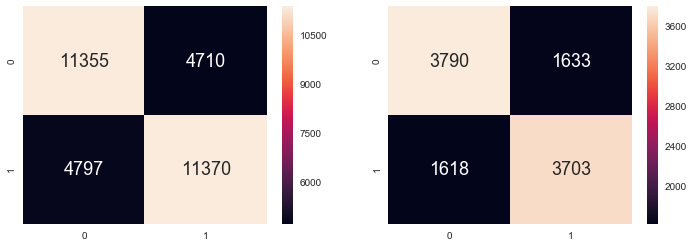

In [59]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Age", "Height", "Weight", "Gender"]

y = pd.DataFrame(g_df_upsampled['Medal'])
X = pd.DataFrame(g_df_upsampled[predictors]) 
 
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X_train, y_train)                                        # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [60]:
GymnasticsData.sample(n=10)

,ID,Name,Medal,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Gender
229037,115001,Oleq Stepko,No,M,18.0,160.000000,55.000000,Ukraine,UKR,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,1
230871,115870,Kerri Allyson Strug (-Fischer),No,F,14.0,142.000000,37.000000,United States,USA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Individual All-Around,0
217842,109416,Vitaly Venediktovich Shcherbo,No,M,24.0,169.000000,68.000000,Belarus,BLR,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Men's Floor Exercise,1
239345,119970,Arne Thomsen,No,M,26.0,172.000000,63.000000,Denmark,DEN,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Men's Horizontal Bar,1
152280,76437,Michel Mathiot,No,M,25.0,163.000000,65.000000,France,FRA,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Floor Exercise,1
17946,9537,Teja Belak,No,F,22.0,157.000000,48.000000,Slovenia,SLO,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Women's Horse Vault,0
238754,119693,Nancy Lynn Thies (-Marshall),No,F,15.0,161.000000,49.000000,United States,USA,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,0
41873,21585,"Joseph ""Jos"" Cillien",No,M,25.0,162.055105,55.758883,Luxembourg,LUX,1936 Summer,1936,Summer,Berlin,Gymnastics,Gymnastics Men's Pommelled Horse,1
81688,41474,Andrs Gonzlez Navas,No,M,18.0,166.000000,59.000000,Cuba,CUB,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Floor Exercise,1
189739,95295,Carlos Alberto Pizzini,No,M,22.0,175.000000,75.000000,Argentina,ARG,1964 Summer,1964,Summer,Tokyo,Gymnastics,Gymnastics Men's Floor Exercise,1


### Prediction of Class "Medal" Probabilities

In [61]:
# Extract Gymnasts for Prediction
GymnasticsData_pred = GymnasticsData[GymnasticsData["Name"].isin(["Yury Sergeyevich Ryazanov", "Carly Rae Patterson (-Caldwell)", "Linda Joan Metheny (-Mulvihill)", "William G. Merz"])]

# Extract Predictors for Prediction
X_pred = pd.DataFrame(GymnasticsData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)

y_pred = pd.DataFrame(y_pred, columns = ["PredMedal"], index = GymnasticsData_pred.index)
Gymnastics_acc = pd.concat([GymnasticsData_pred[["Name", "Medal"]], y_pred], axis = 1)

# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)

# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProMedal"], index = GymnasticsData_pred.index)
Gymnastics_conf = pd.concat([Gymnastics_acc, y_prob], axis = 1)

Gymnastics_conf

,Name,Medal,PredMedal,ProMedal
157313,William G. Merz,No,Yes,0.599180
157314,William G. Merz,Yes,Yes,0.599180
157315,William G. Merz,Yes,Yes,0.599180
157316,William G. Merz,No,Yes,0.599180
157318,William G. Merz,Yes,Yes,0.599180
157319,William G. Merz,Yes,Yes,0.599180
157320,William G. Merz,Yes,Yes,0.599180
157588,Linda Joan Metheny (-Mulvihill),No,No,0.235103
157590,Linda Joan Metheny (-Mulvihill),No,No,0.235103
157591,Linda Joan Metheny (-Mulvihill),No,No,0.235103


# Athletics


In [62]:
Amedal = pd.DataFrame(AthleticsData['Medal'])       
Aage = pd.DataFrame(AthleticsData['Age'])  
Aheight = pd.DataFrame(AthleticsData['Height'])

No     30013
Yes     2737
Name: Medal, dtype: int64


,ID,Age,Height,Weight,Year,Gender
count,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000
mean,67119.810473,25.384699,176.789774,70.235578,1974.758840,0.702504
std,39238.991295,4.414264,8.762462,14.927920,32.794761,0.457164
min,8.000000,12.000000,142.000000,35.000000,1896.000000,0.000000
25%,32710.250000,22.000000,171.000000,60.000000,1952.000000,0.000000
50%,67709.000000,25.000000,178.600705,70.000000,1984.000000,1.000000
75%,100784.000000,28.000000,182.000000,75.000000,2000.000000,1.000000
max,135561.000000,52.000000,208.000000,165.000000,2016.000000,1.000000


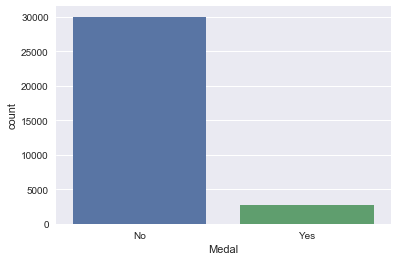

In [63]:
print(AthleticsData["Medal"].value_counts())
sb.countplot(AthleticsData['Medal'])
AthleticsData.describe()

## Balancing imbalanced classes by Up-sampling Minority Class  

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

In [64]:
from sklearn.utils import resample

In [65]:
# Separate majority and minority classes
a_df_majority = AthleticsData[AthleticsData.Medal=='No']
a_df_minority = AthleticsData[AthleticsData.Medal=='Yes']
 
# Upsample minority class
a_df_minority_upsampled = resample(a_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=30013,    # to match majority class
                                 random_state=100) # reproducible results
 
# Combine majority class with upsampled minority class
a_df_upsampled = pd.concat([a_df_majority, a_df_minority_upsampled])
 
# Display new class counts
a_df_upsampled.Medal.value_counts()

No     30013
Yes    30013
Name: Medal, dtype: int64

---

## Use of data science / machine learning

### Prediction using a Random Forest

Multi-Variate Classification problem.   

Response Variable : **Medal**     
Predictors : **Age, Height, Weight, Gender**       

In [1]:
# Import essential models and functions from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["Age", "Height", "Weight", "Gender"]

y = pd.DataFrame(a_df_upsampled['Medal'])
X = pd.DataFrame(a_df_upsampled[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X_train, y_train)                                        # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

NameError: name 'pd' is not defined

In [67]:
AthleticsData.sample(n=20)

,ID,Name,Medal,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Gender
132796,66842,Stine Elisabeth Larsen,No,F,28.0,158.000000,47.000000,Norway,NOR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Marathon,0
93052,47135,"Robert ""Robbie"" Heffernan",No,M,26.0,171.000000,58.000000,Ireland,IRL,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 20 kilometres Walk,1
44006,22676,"Michael Alexander ""Mike"" Conley",Yes,M,29.0,185.000000,78.000000,United States,USA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Triple Jump,1
221296,111210,Om Prakash Singh Karhana,No,M,25.0,196.000000,125.000000,India,IND,2012 Summer,2012,Summer,London,Athletics,Athletics Men's Shot Put,1
38913,20027,Christopher Maude Chavasse,No,M,23.0,178.600705,73.267414,Great Britain,GBR,1908 Summer,1908,Summer,London,Athletics,Athletics Men's 400 metres,1
209917,105397,Shamar Sands,No,M,27.0,183.000000,75.000000,Bahamas,BAH,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 110 metres Hurdles,1
217419,109204,Mohammad Shamsuddin,No,M,20.0,175.000000,60.000000,Bangladesh,BAN,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,1
42989,22170,Marius Iulian Cocioran,No,M,33.0,173.000000,64.000000,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,1
256053,128214,Karin Elisabeth Wallgren-Lundgren,No,F,28.0,166.000000,56.000000,Sweden,SWE,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 400 metres,0
268536,134341,Zeng Xiujun,No,F,21.0,162.000000,56.000000,China,CHN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 100 metres,0


### Prediction of Class "Medal" Probabilities

In [68]:
# Extract Athletes for Prediction
AthleticsData_pred = AthleticsData[AthleticsData["Name"].isin(["Frantiek Souek", "Mrta Antal-Rudas", "Caterine Ibargn Mena", "Asbel Kipruto Kiprop"])]

# Extract Predictors for Prediction
X_pred = pd.DataFrame(AthleticsData_pred[predictors])

# Predict Response corresponding to Predictors
y_pred = rforest.predict(X_pred)

y_pred = pd.DataFrame(y_pred, columns = ["PredMedal"], index = AthleticsData_pred.index)
Athletics_acc = pd.concat([AthleticsData_pred[["Name", "Medal"]], y_pred], axis = 1)

# Predict Probabilities corresponding to Predictors
y_prob = rforest.predict_proba(X_pred)

# Summarize the Probabilities with the Predictions
y_prob = pd.DataFrame(list(y_prob[:,1]), columns = ["ProMedal"], index = AthleticsData_pred.index)
Athletics_conf = pd.concat([Athletics_acc, y_prob], axis = 1)

Athletics_conf

,Name,Medal,PredMedal,ProMedal
8130,Mrta Antal-Rudas,No,No,0.492366
8131,Mrta Antal-Rudas,Yes,No,0.489711
8132,Mrta Antal-Rudas,No,No,0.484793
101860,Caterine Ibargn Mena,No,Yes,0.543943
101861,Caterine Ibargn Mena,Yes,Yes,0.630836
101862,Caterine Ibargn Mena,Yes,Yes,0.619441
119714,Asbel Kipruto Kiprop,Yes,No,0.460791
119715,Asbel Kipruto Kiprop,No,Yes,0.528559
119716,Asbel Kipruto Kiprop,No,Yes,0.509245
225677,Frantiek Souek,No,No,0.249260


In [69]:
AthleticsMN.mean()

ID        67033.621831
Age          25.374767
Height      176.251594
Weight       69.295868
Year       1975.592643
Gender        0.702795
dtype: float64

In [70]:
AthleticsMY.mean()

ID        68064.925466
Age          25.462104
Height      178.600705
Weight       73.267414
Year       1965.615638
Gender        0.699306
dtype: float64